In [19]:
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
# chama e abre o arquivo com o pandas

df = pd.read_csv('titanic.csv')

In [21]:
# mostra as primeiras linhas
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [22]:
# quantidade de linhas e colunas
df.shape

(891, 12)

In [23]:
# copia o dataframe(copia de segurança ou copia para uso variavel )
df_backup = df.copy()

In [24]:
# vendo os Nulos por coluna 
nulos_por_coluna = df.isnull().sum()
print(nulos_por_coluna)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [25]:
# vendo os nulos por linha, por padrão é no eixo Y, então colocamos no axis=1 que seria no eixo X1

nulos_por_linha = df.isnull().sum(axis=1)
print(nulos_por_linha)

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64


In [26]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
df_info = df.info()
print(df_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [28]:
#df = df.drop_duplicates(['PassengerId']) dropa os duplicados de uma coluna especifica 
df = df.drop_duplicates()

In [29]:
df = df.drop_duplicates()


In [30]:
# renomear as colunas
df.rename(columns={
        'PassengerId': 'IdPassageiro',
        'Survived': 'Sobreviveu',
        'Pclass': 'Classe',
        'Name': 'Nome',
        'Sex': 'Genero',
        'Age': 'Idade',
        'Ticket': 'Bilhete',
        'Fare': 'Tarifa',
        'Cabin': 'Cabine',
        'Embarked':'Embarque'
}, inplace=True)

In [31]:
titanic_tratado = df.to_csv('titanic_tratado.csv', index=False)

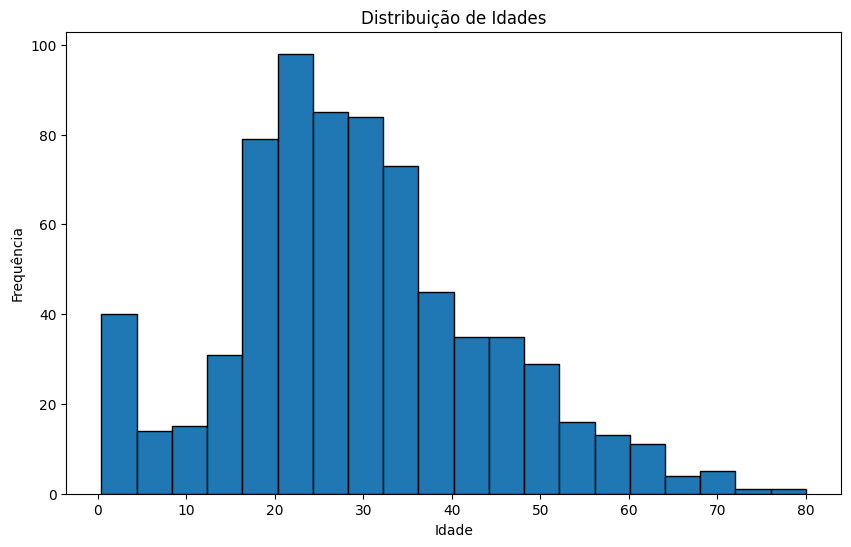

In [32]:
#Distribuição de Idade

plt.figure(figsize=(10, 6))
plt.hist(df['Idade'], bins=20, edgecolor='black')
plt.title('Distribuição de Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

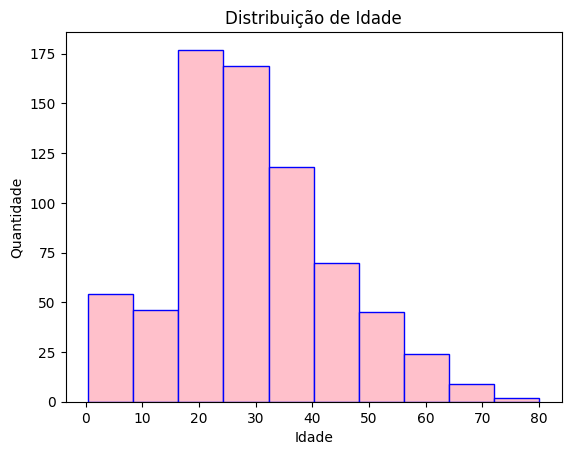

In [33]:
#Qual é a distribuição de idades?
#plotagem
df["Idade"].plot.hist(bins=10, edgecolor= "blue", color="pink")
plt.xlabel("Idade")
plt.ylabel("Quantidade")
plt.title("Distribuição de Idade")
plt.show()

### Teste de Hipotese 


Teste de idade e Sobrevivencia     

Hipotese Nula H0: Os sobreviventes não dependem da idade de passeiro 
Hipotese Alternativa H1: Os Sobreviventes dependem da idade de passageiros 

In [34]:
from scipy.stats import ttest_ind
import seaborn as sns

In [35]:
idade_sobreviventes = df[df['Sobreviveu'] == 1]['Idade'].dropna()
idade_nao_sobreviventes = df[df['Sobreviveu'] == 0]['Idade'].dropna()

#teste c 
estatic_t, valor_p = ttest_ind(idade_sobreviventes, idade_nao_sobreviventes)

print("Estatística t:", estatic_t, "Valor P:", valor_p)

Estatística t: -2.06668694625381 Valor P: 0.03912465401348249


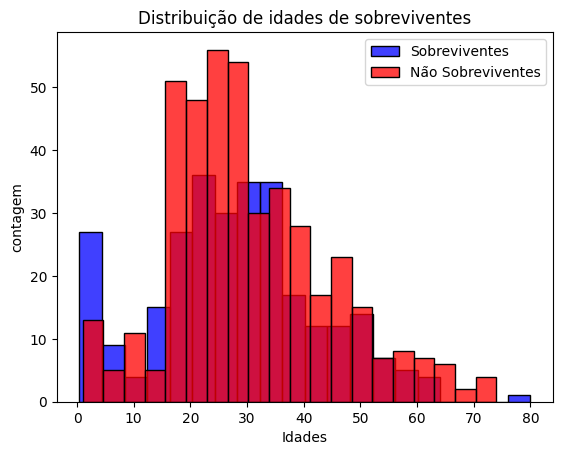

Rejeitamos a hipótese nula


In [36]:
sns.histplot(idade_sobreviventes, color="blue", label="Sobreviventes", bins=20)
sns.histplot(idade_nao_sobreviventes, color="red", label="Não Sobreviventes", bins=20)
# rotulo
plt.legend()
plt.title('Distribuição de idades de sobreviventes')
plt.xlabel('Idades')
plt.ylabel('contagem')
plt.show()


#interpretação
if valor_p < 0.05:
    print("Rejeitamos a hipótese nula")
else:
    print("Não rejeitamos a hipótese nula")



In [37]:
baby_df = df.sample(100)

In [38]:
baby_df.head(3)

,IdPassageiro,Sobreviveu,Classe,Nome,Genero,Idade,SibSp,Parch,Bilhete,Tarifa,Cabine,Embarque
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.500,C106,S
667,668,0,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.775,NaN,S
757,758,0,2,"Bailey, Mr. Percy Andrew",male,18.0,0,0,29108,11.500,NaN,S


SELECT genero, Count(idpassageiro) As Contagem
From titanic_tratado
GROUP By genero

In [42]:
import sqlite3

In [ ]:
conn = sqlite3.connect(':memory:')

baby_df.to_sql('baby_df', conn, index=False, if_exists='replace')

query_sql = """
SELECT genero, Count(idpassageiro) As Contagem
From titanic_tratado
GROUP By genero
"""

contagem_por_genero = pd.read_sql_query(query_sql, conn)
print(contagem_por_genero)

conn.close()




In [44]:
#SQL
# conexão 
conn = sqlite3.connect(':memory:')
#escrever o df em uma tabela sql
baby_df.to_sql('baby_df', conn, index=False, if_exists='replace') 
#executar a consulta 
query_sql = """
SELECT Genero, COUNT(IdPassageiro) AS Contagem
FROM baby_df
GROUP BY Genero;
"""
contagem_por_gen = pd.read_sql_query(query_sql, conn)
print(contagem_por_gen)
#fechar a conexão
conn.close()

   Genero  Contagem
0  female        30
1    male        70


In [45]:
#pandas
contagem_por_genero = baby_df['Genero'].value_counts()
contagem_por_genero.columns = ['Genero', 'Contagem']
print(contagem_por_genero)

Genero
male      70
female    30
Name: count, dtype: int64
